
0: 448x448 87 circles, 7.4ms
Speed: 1.0ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 448)


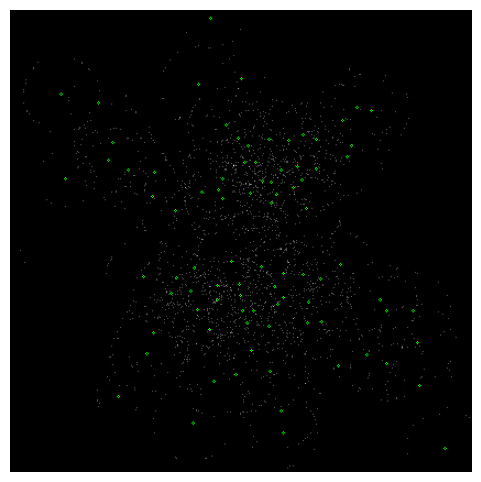

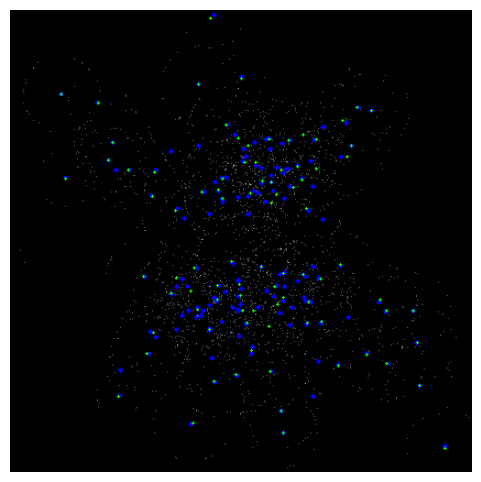

([0.3741496598639456, 0.5238095238095238, 0.564625850340136],
 [0.632183908045977, 0.8850574712643678, 0.9540229885057471],
 [0.47008547008547014, 0.6581196581196581, 0.7094017094017092])

In [7]:
import sys

sys.path.append(r'/user/gr1/delphi/dghezzi/KeyPoint_Detection')

import KP as kpl
import numpy as np

image_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/Prova420.jpg'
txt_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/Prova420.txt'
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/training_output/weights/last.pt'

results = kpl.inference(image_path, model_path, confidence=0.4, show_image=True, save_image=False)
kpl.show_with_MCpoints(results, image_path, txt_path, show_image=True, save_image=False, img_size=(420, 420))

pred_points = [(float(x), float(y)) for r in results if r.keypoints is not None for kp in r.keypoints.xy for x,y in kp]
gt_points   = np.loadtxt(txt_path, usecols=(-3, -2)) * (420, 420)

pred_points = np.array(pred_points, dtype=float)
gt_points   = np.array(gt_points, dtype=float)

kpl.compute_pck_metrics(pred_points, gt_points, thresholds=[2,4,6])

Epoch9 ==> @4px: p=0.497, r=0.811, f1=0.616 (conf=0.4, 90 centri) --- nota: è il migliore in pose (OKS)

Epoch14 ==> @4px: p=0.510, r=0.8862, f1=0.641 (conf=0.4, 87 centri)

Epoch21 ==> @4px: p=0.551, r=0.890, f1=0.681 (conf=0.4, 91 centri)